<h1><center>Clustering Chicago Public Libraries by Top 10 Nearby Venues</center></h1>

<h4><center>Author: Kunyu He</center></h4>
<h5><center>University of Chicago CAPP'20<h5><center>

### Executive Summary

In this notebook, I clustered 80 public libraries in the city of Chicago into 7 clusters, based on the categories of their top ten venues nearby. It would be a nice guide for those who would like to spend their days in these libraries, exploring their surroundings, but become tired of staying in only one or few of them over time.

The rest of this notebook is organized as follows:

[Data]((https://dataplatform.cloud.ibm.com/data/jupyter2/runtimeenv2/v1/wdpx/service/notebook/conda2x4b4a004761bfc4fb7999c959d3c200ec7/dsxjpy/dded3b111c2248748711f2e0af8908a960fd32ff81d51b803ea16ca6d27c85a032d73d3162155e40276ce416ddb676be350986f93c2c59/container/notebooks/576fdac1-e752-47e2-ba6d-c97780698b85?project=b4a00476-1bfc-4fb7-999c-959d3c200ec7&api=v2&env=a#Data)) section briefly introduces the data source. [Methodology]((https://dataplatform.cloud.ibm.com/data/jupyter2/runtimeenv2/v1/wdpx/service/notebook/conda2x4b4a004761bfc4fb7999c959d3c200ec7/dsxjpy/dded3b111c2248748711f2e0af8908a960fd32ff81d51b803ea16ca6d27c85a032d73d3162155e40276ce416ddb676be350986f93c2c59/container/notebooks/576fdac1-e752-47e2-ba6d-c97780698b85?project=b4a00476-1bfc-4fb7-999c-959d3c200ec7&api=v2&env=a#Methodology)) section briefly introduced the unsupervised learning algorithms used. In the [Imports and Format Parameters]((https://dataplatform.cloud.ibm.com/data/jupyter2/runtimeenv2/v1/wdpx/service/notebook/conda2x4b4a004761bfc4fb7999c959d3c200ec7/dsxjpy/dded3b111c2248748711f2e0af8908a960fd32ff81d51b803ea16ca6d27c85a032d73d3162155e40276ce416ddb676be350986f93c2c59/container/notebooks/576fdac1-e752-47e2-ba6d-c97780698b85?project=b4a00476-1bfc-4fb7-999c-959d3c200ec7&api=v2&env=a#Imports-and-Format-Parameters)) section, I install and import the Python libraries used and set the global constants for future use. [Getting and Cleaning Data]((https://dataplatform.cloud.ibm.com/data/jupyter2/runtimeenv2/v1/wdpx/service/notebook/conda2x4b4a004761bfc4fb7999c959d3c200ec7/dsxjpy/dded3b111c2248748711f2e0af8908a960fd32ff81d51b803ea16ca6d27c85a032d73d3162155e40276ce416ddb676be350986f93c2c59/container/notebooks/576fdac1-e752-47e2-ba6d-c97780698b85?project=b4a00476-1bfc-4fb7-999c-959d3c200ec7&api=v2&env=a#Getting-and-Cleaning-Data)) sections cotains code downloading and cleaning public library and nearby venues data from external sources. I perform dimension reduction, clustering and labelling mainly in the [Data Analysis]((https://dataplatform.cloud.ibm.com/data/jupyter2/runtimeenv2/v1/wdpx/service/notebook/conda2x4b4a004761bfc4fb7999c959d3c200ec7/dsxjpy/dded3b111c2248748711f2e0af8908a960fd32ff81d51b803ea16ca6d27c85a032d73d3162155e40276ce416ddb676be350986f93c2c59/container/notebooks/576fdac1-e752-47e2-ba6d-c97780698b85?project=b4a00476-1bfc-4fb7-999c-959d3c200ec7&api=v2&env=a#Data-Analysis)) section. Finally, resulting folium map is presented in the [Results]((https://dataplatform.cloud.ibm.com/data/jupyter2/runtimeenv2/v1/wdpx/service/notebook/conda2x4b4a004761bfc4fb7999c959d3c200ec7/dsxjpy/dded3b111c2248748711f2e0af8908a960fd32ff81d51b803ea16ca6d27c85a032d73d3162155e40276ce416ddb676be350986f93c2c59/container/notebooks/576fdac1-e752-47e2-ba6d-c97780698b85?project=b4a00476-1bfc-4fb7-999c-959d3c200ec7&api=v2&env=a#Results)) section and [Discussions]((https://dataplatform.cloud.ibm.com/data/jupyter2/runtimeenv2/v1/wdpx/service/notebook/conda2x4b4a004761bfc4fb7999c959d3c200ec7/dsxjpy/dded3b111c2248748711f2e0af8908a960fd32ff81d51b803ea16ca6d27c85a032d73d3162155e40276ce416ddb676be350986f93c2c59/container/notebooks/576fdac1-e752-47e2-ba6d-c97780698b85?project=b4a00476-1bfc-4fb7-999c-959d3c200ec7&api=v2&env=a#Discussions)) section covers caveats and potential improvements.

### Data

Information of the public libraries is provided by [Chicago Public Library](https://www.chipublib.org/). You can access the data [here]((https://data.cityofchicago.org/Education/Libraries-Locations-Hours-and-Contact-Information/x8fc-8rcq)).

Information of the top venues near to (within a range of 500 meters) the public libraries is acquired from [FourSquare API](https://developer.foursquare.com/). You can explore the surroundings of any geographical coordinates of interest with a developer account.

### Methodology

The clustering algorithms used include:

* [Principal Component Analysis]((https://en.wikipedia.org/wiki/Principal_component_analysis)) with [Truncated SVD]((http://infolab.stanford.edu/pub/cstr/reports/na/m/86/36/NA-M-86-36.pdf));
* [KMeans Clustering]((https://en.wikipedia.org/wiki/K-means_clustering));
* [Hierarchical Clustering]((https://en.wikipedia.org/wiki/Hierarchical_clustering)) with [Ward's Method]((https://en.wikipedia.org/wiki/Ward%27s_method)).

PCA with TSVD is used for reducing the dimension of our feature matrix, which is a [sparse matrix]((https://en.wikipedia.org/wiki/Sparse_matrix)). KMeans and hierarchical clusering are applied to cluster the libraries in terms of their top ten nearby venue categories and the final labels are derived from hierarchical clustering with ward distance.

### Imports and Format Parameters

In [1]:
import pandas as pd
import numpy as np
import re
import requests
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
from pandas.io.json import json_normalize
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

For visualization, install [folium](https://github.com/python-visualization/folium) and make an additional import.

In [3]:
!conda install --quiet -c conda-forge folium --yes
import folium



# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.7.0                      py_0    conda-forge


In [4]:
%matplotlib inline

title = FontProperties()
title.set_family('serif')
title.set_size(16)
title.set_weight('bold')

axis = FontProperties()
axis.set_family('serif')
axis.set_size(12)

plt.rcParams['figure.figsize'] = [12, 8]

Hard-code the geographical coordinates of the City of Chicago based on [this]((https://www.latlong.net/place/chicago-il-usa-1855.html)) page. Also prepare formatting parameters for folium map markers.

In [5]:
LATITUDE, LOGITUDE = 41.881832, -87.623177

ICON_COLORS = ['red', 'blue', 'green', 'purple', 'orange', 'beige', 'darked']

HTML = """
       <center><h4><b>Library {}</b></h4></center>
       <h5><b>Cluster:</b> {};</h5>
       <h5><b>Hours of operation:</b><br>
           {}</h5>
       <h5><b>Top five venues:</b><br>
           <center>{}<br>
                   {}<br>
                   {}<br>
                   {}<br>
                   {}</center></h5>
    """

### Getting and Cleaning Data

#### Public Library Data

In [6]:
!wget --quiet https://data.cityofchicago.org/api/views/x8fc-8rcq/rows.csv?accessType=DOWNLOAD -O libraries.csv

In [7]:
lib = pd.read_csv('libraries.csv', usecols=['NAME ', 'HOURS OF OPERATION', 'LOCATION'])
lib.columns = ['library', 'hours', 'location']
lib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
library     80 non-null object
hours       80 non-null object
location    80 non-null object
dtypes: object(3)
memory usage: 2.0+ KB


Notice that locations are stored as strings of tuples. Applying the following function to `lib`, we can convert `location` into two separate columns of latitudes and longitudes of the libraries.

In [8]:
def sep_location(row):
    """
    Purpose: seperate the string of location in a given row, convert it into a tuple
        of floats, representing latitude and longitude of the library respectively
    
    Inputs:
        row (PandasSeries): a row from the `lib` dataframe
    
    Outputs:
        (tuple): of floats representing latitude and longitude of the library
    """
    
    return tuple(float(re.compile('[()]').sub("", coordinate)) for \
            coordinate in row.location.split(', '))

In [9]:
lib[['latitude', 'longitude']] = lib.apply(sep_location, axis=1).apply(pd.Series)
lib.drop('location', axis=1, inplace=True)
lib.head()

,library,hours,latitude,longitude
0,Albany Park,"M, W: 10AM-6PM; TU, TH: 12PM-8PM; F, SA: 9AM-...",41.975456,-87.714090
1,Altgeld,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",41.654730,-87.602230
2,Archer Heights,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",41.801214,-87.726491
3,Austin,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",41.889272,-87.765712
4,Austin-Irving,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",41.953174,-87.779387


Now data on the public libraries is ready for analysis.

#### Venue Data

Use sensitive code cell below to enter FourSquare credentials.

In [10]:
# The code was removed by Watson Studio for sharing.

Get top ten venues near to the libraries and store data into the `venues` dataframe, with radius set to 1000 meters by default. You can update the `VERSION` parameter to get up-to-date venue information.

In [11]:
VERSION = '20181206'
FEATURES = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']

def get_venues(libraries, latitudes, longitudes, limit=10, radius=1000.0):
    """
    Purpose: download nearby venues information through FourSquare API in a dataframe
    
    Inputs:
        libraries (PandasSeries): names of the public libraries
        latitudes (PandasSeries): latitudes of the public libraries
        longitudes (PandasSeries): longitudes of the public libraries
        limit (int): number of top venues to explore, default to 10
        radius (float): range of the circle coverage to define 'nearby', default to 1000.0
    
    Outputs: (DataFrame)   
    """
    venues_lst = []
    for library, lat, lng in zip(libraries, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format( \
              CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, limit)
        items = requests.get(url).json()["response"]['groups'][0]['items']
        venues_lst.append([(library, lat, lng, \
                            item['venue']['name'], \
                            item['venue']['location']['lat'], item['venue']['location']['lng'], \
                            item['venue']['categories'][0]['name']) for item in items])

    venues = pd.DataFrame([item for venues_lst in venues_lst for item in venues_lst])
    venues.columns = ['Library', 'Library Latitude', 'Library Longitude', \
                      'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return venues

In [12]:
venues = get_venues(lib.library, lib.latitude, lib.longitude)
venues.head()

,Library,Library Latitude,Library Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albany Park,41.975456,-87.71409,Tre Kronor,41.975842,-87.711037,Scandinavian Restaurant
1,Albany Park,41.975456,-87.71409,Cairo Nights Hookah Lounge,41.975776,-87.715547,Hookah Bar
2,Albany Park,41.975456,-87.71409,2 Asian Brothers,41.975832,-87.709655,Vietnamese Restaurant
3,Albany Park,41.975456,-87.71409,Merla's Kitchen,41.976063,-87.713559,Restaurant
4,Albany Park,41.975456,-87.71409,Banpojung,41.975707,-87.715609,Korean Restaurant


Count unique libraries, venues and vanue categories in our `venues` dataframe.

In [14]:
print('There are {} unique libraries, {} unique venues and {} unique categories.'.format( \
      len(venues.Library.unique()), \
      len(venues.Venue.unique()), \
      len(venues['Venue Category'].unique())))

There are 80 unique libraries, 653 unique venues and 173 unique categories.


Now our `venues` data is also ready for furtehr analysis.

### Data Analysis

#### Data Preprocessing

Apply one-hot encoding to get our feature matrix, group the venues by libraries and calculate the frequency of each venue category around specific library by taking the mean.

In [15]:
features = pd.get_dummies(venues['Venue Category'], prefix="", prefix_sep="")
features.insert(0, 'Library Name', venues.Library)
X = features.groupby(['Library Name']).mean().iloc[:, 1:]
X.head()

,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse,Waterfront,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
Library Name,,,,,,,,,,,,,,,,,,,,,
Albany Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0
Altgeld,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Archer Heights,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Austin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Austin-Irving,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are too many categories of venues in our features dataframe. Perform PCA to reduce the dimension of our data. Notice here most of the data entries in our feature matrix is zero, which means our data is sparse data, perform dimension reduction with truncated SVD. 

First, attempt to find the least number of dimensions to keep 85% of the variance and transform the feature matrix.

In [16]:
tsvd = TruncatedSVD(n_components=X.shape[1]-1, random_state=0).fit(X)
least_n = np.argmax(tsvd.explained_variance_ratio_.cumsum() > 0.85)
print("In order to keep 85% of total variance, we need to keep at least {} dimensions.".format(least_n))

X_t = pd.DataFrame(TruncatedSVD(n_components=least_n, random_state=0).fit_transform(X))

In order to keep 85% of total variance, we need to keep at least 36 dimensions.


Use KMeans on the transformed data and find the best number of k below.

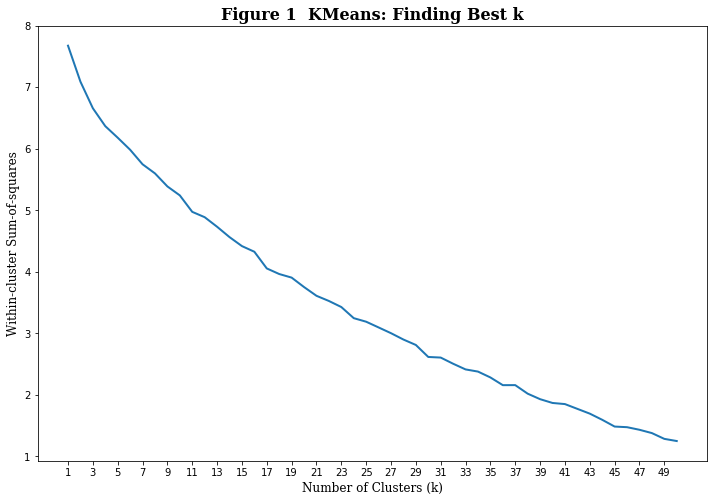

In [17]:
ks = np.arange(1, 51)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k, random_state=0).fit(X_t)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, linewidth=2)
plt.title("Figure 1  KMeans: Finding Best k", fontproperties=title)
plt.xlabel('Number of Clusters (k)', fontproperties=axis)
plt.ylabel('Within-cluster Sum-of-squares', fontproperties=axis)
plt.xticks(np.arange(1, 51, 2))
plt.show()

It's really hard to decide based on elbow plot, as the downward trend lasts until 50. Alternatively, try Ward Hierachical Clustering method.

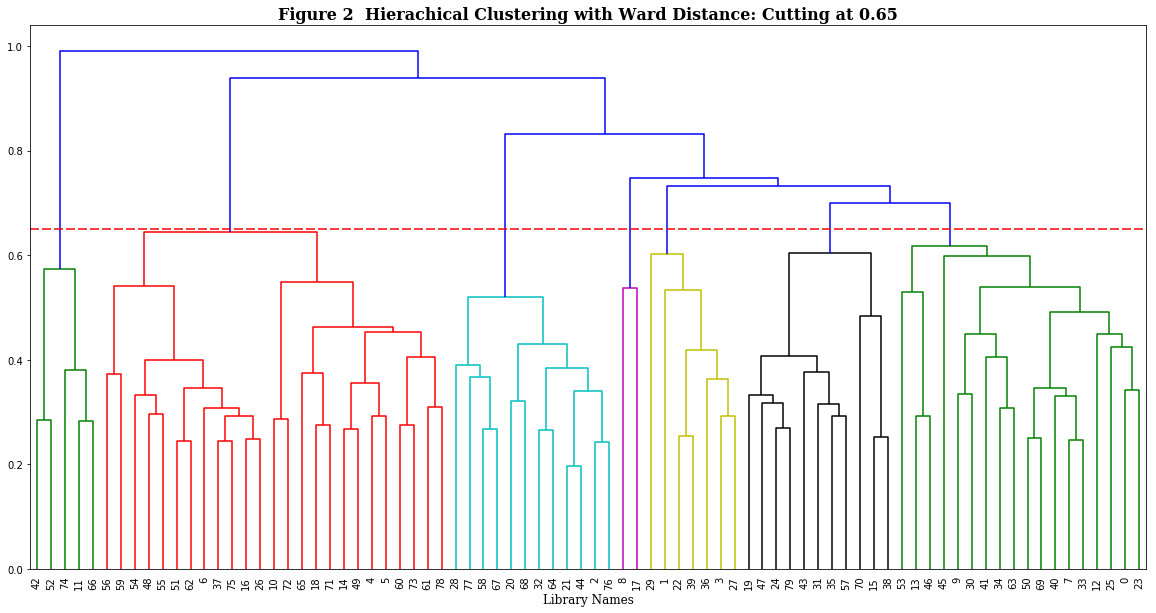

In [18]:
merging = linkage(X_t, 'ward')

plt.figure(figsize=[20, 10])
dendrogram(merging,
           leaf_rotation=90,
           leaf_font_size=10,
           distance_sort='descending',
           show_leaf_counts=True)
plt.axhline(y=0.65, dashes=[6, 2], c='r')
plt.xlabel('Library Names', fontproperties=axis)
plt.title("Figure 2  Hierachical Clustering with Ward Distance: Cutting at 0.65", fontproperties=title)
plt.show()  

The result is way better than KMeans. We see six clusters cutting at approximately 0.70. Label the clustered libraries below. Join the labelled library names with `lib` to bind geographical coordinates and hours of operation of the puclic libraries.

In [19]:
labels = fcluster(merging, t=0.65, criterion='distance')
df = pd.DataFrame(list(zip(X.index.values, labels)))
df.columns = ['library', 'cluster']

merged = pd.merge(lib, df, how='inner', on='library')
merged.head()

,library,hours,latitude,longitude,cluster
0,Albany Park,"M, W: 10AM-6PM; TU, TH: 12PM-8PM; F, SA: 9AM-...",41.975456,-87.714090,7
1,Altgeld,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",41.654730,-87.602230,5
2,Archer Heights,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",41.801214,-87.726491,3
3,Austin,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",41.889272,-87.765712,5
4,Austin-Irving,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",41.953174,-87.779387,2


### Results

Create a `folium.Map` instance `chicago` with initial zoom level of 11.

In [20]:
chicago = folium.Map(location=[LATITUDE, LOGITUDE], zoom_start=11)

Check the clustered map! Click on the icons to see the name, hours of operation and top five nearby venues of each public library in the city of Chicago!

In [22]:
for index, row in merged.iterrows():
    venues_name = venues[venues.Library == row.library].Venue.values
    label = folium.Popup(HTML.format(row.library, row.cluster, row.hours, venues_name[0], venues_name[1], venues_name[2], venues_name[3], venues_name[4]), parse_html=False)
    folium.Marker([row.latitude, row.longitude], popup=label, icon=folium.Icon(color=ICON_COLORS[row.cluster-1], icon='book')).add_to(chicago)

chicago

### Discussions

There might be several caveats in my analysis:

* Libraries are clustered merely according to categories of their surrounding venues. Other characteristics are left out from my considseration;
* We can see that the resulting venues are not unique, i.e. not every public library has ten distinct venues. This might results from the fact that venues share same names in some cases, or nearby areas of these libraries overlap.

Future improvements might include:

* Include hyperlinks to venue photos and tips to make it easier for users to check up in advance;
* Use better algorithms to cluster the libraries.